In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [ ]:
# 解压PaddleDetection源码
!unzip /home/aistudio/data/data63328/PaddleDetection.zip -d ~/work/

Archive:  /home/aistudio/data/data63328/PaddleDetection.zip
replace /home/aistudio/work/PaddleDetection/requirements.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
%cd ~/work/PaddleDetection
! pip install -r requirements.txt
! pip install pycocotools

/home/aistudio/work/PaddleDetection
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 1.0MB 13.7MB/s eta 0:00:01
Looking in indexes: https://mirror.baidu.com/pypi/simple/
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=278363 sha256=9c8d1a29012c46a3c9698e5718a1c92a9c8884974be32dcbf3657136f2e9afb7
  Stored in directory: /home/aistudio/.cache/pip/wheels/fb/44/67/8baa69040569b1edbd7776ec6f82c387663e724908aaa60963
Successfully built pycocotools


In [ ]:
# 解压数据集
!unzip /home/aistudio/data/data36352/scut_head.zip -d ~/work/VOCdevkit/VOC2007


In [ ]:
%cd

/home/aistudio


In [ ]:
#数据集划分
import os
import random
 
root_dir='work/VOCdevkit/VOC2007/'
 
## 0.7train 0.1val 0.2test
trainval_percent = 0.8
train_percent = 0.7
xmlfilepath = root_dir+'Annotations'
txtsavepath = root_dir+'ImageSets/Main'
total_xml = os.listdir(xmlfilepath)
 
num = len(total_xml)  # 100
list = range(num)
tv = int(num*trainval_percent)  # 80
tr = int(tv*train_percent)  # 80*0.7=56
trainval = random.sample(list, tv)
train = random.sample(trainval, tr)
 
ftrainval = open(root_dir+'ImageSets/Main/trainval.txt', 'w')
ftest = open(root_dir+'ImageSets/Main/test.txt', 'w')
ftrain = open(root_dir+'ImageSets/Main/train.txt', 'w')
fval = open(root_dir+'ImageSets/Main/val.txt', 'w')
 
for i in list:
    name = total_xml[i][:-4]+'\n'
    if i in trainval:
        ftrainval.write(name)
        if i in train:
            ftrain.write(name)
        else:
            fval.write(name)
    else:
        ftest.write(name)
 
ftrainval.close()
ftrain.close()
fval.close()

In [ ]:
%cd

/home/aistudio


In [ ]:
import glob
# path_file_number=glob.glob('D:/case/test/testcase/checkdata/*.py')#或者指定文件下个数
path_file_number=glob.glob(pathname='work/VOCdevkit/VOC2007/JPEGImages/*') #获取当前文件夹下个数
print(len(path_file_number))

4526


In [ ]:
!python work/PaddleDetection/dataset/voc/create_list.py -d './work'

Traceback (most recent call last):
  File "work/PaddleDetection/dataset/voc/create_list.py", line 45, in <module>
    main(config)
  File "work/PaddleDetection/dataset/voc/create_list.py", line 31, in main
    create_voc_list(voc_path)
  File "/home/aistudio/work/PaddleDetection/ppdet/utils/download.py", line 166, in create_voc_list
    create_list(year_dirs, data_dir)
  File "/home/aistudio/work/PaddleDetection/ppdet/utils/voc_utils.py", line 37, in create_list
    trainval, test = _walk_voc_dir(year_dir, output_dir)
  File "/home/aistudio/work/PaddleDetection/ppdet/utils/voc_utils.py", line 62, in _walk_voc_dir
    for img_file in os.listdir(img_dir):
FileNotFoundError: [Errno 2] No such file or directory: './work/VOCdevkit/.ipynb_checkpoints/JPEGImages'


In [ ]:
!python -u work/PaddleDetection/tools/train.py -c work/test1_ppyolo.yml \
                        --use_vdl=true \
                        --vdl_log_dir=vdl_dir-ppyolo/scalar \
                        --eval\
                        # -r output/test1-ppyolo/best_model

In [ ]:
!python -u work/PaddleDetection/tools/train.py -c work/test2_yolov4.yml \
                        --use_vdl=true \
                        --vdl_log_dir=vdl_dir-yolov4/scalar \
                        --eval

In [ ]:
!python work/PaddleDetection/tools/eval.py -c work/test1_ppyolo.yml  \
                                    -o weights=output/test1_ppyolo/best_model

You are using Paddle compiled with TensorRT, but TensorRT dynamic library is not found. Ignore this if TensorRT is not needed.
/home/aistudio/work/PaddleDetection/ppdet/core/workspace.py:118: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  isinstance(merge_dct[k], collections.Mapping)):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/math_op_patch.py:297: UserWarning: /home/aistudio/work/PaddleDetection/ppdet/modeling/anchor_heads/iou_aware.py:64
The behavior of expression A * B has been unified with elementwise_mul(X, Y, axis=-1) from Paddle 2.0. If your code works well in the older versions but crashes in this version, try to use elementwise_mul(X, Y, axis=0) instead of A * B. This transitional warning will be dropped in the future.
  op_type, op_type, EXPRESSION_MAP[method_name]))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packag

In [ ]:
!python work/PaddleDetection/tools/infer.py -c work/test1_ppyolo.yml  \
                                            --infer_img=work/2.png \
                                            -o weights=output/test1_ppyolo/14000

You are using Paddle compiled with TensorRT, but TensorRT dynamic library is not found. Ignore this if TensorRT is not needed.
/home/aistudio/work/PaddleDetection/ppdet/core/workspace.py:118: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  isinstance(merge_dct[k], collections.Mapping)):
W0102 23:19:20.408790 16183 device_context.cc:320] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0102 23:19:20.413432 16183 device_context.cc:330] device: 0, cuDNN Version: 7.6.
2021-01-02 23:19:27,200-INFO: Load categories from work/label_list.txt
2021-01-02 23:19:27,441-INFO: Infer iter 0
2021-01-02 23:19:27,455-INFO: Detection bbox results save in output/2.png


In [ ]:
!python work/PaddleDetection/tools/eval.py -c work/test2_yolov4.yml  \
                                    -o weights=output/best_v4

You are using Paddle compiled with TensorRT, but TensorRT dynamic library is not found. Ignore this if TensorRT is not needed.
/home/aistudio/work/PaddleDetection/ppdet/core/workspace.py:118: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  isinstance(merge_dct[k], collections.Mapping)):
/home/aistudio/work/PaddleDetection/ppdet/modeling/losses/yolo_loss.py:71: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  "config YOLOv3Loss.batch_size is deprecated, "
2021-01-02 23:20:13,934-WARNING: config YOLOv3Loss.batch_size is deprecated, training batch size should be set by TrainReader.batch_size
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/math_op_patch.py:297: UserWarning: /home/aistudio/work/PaddleDetection/ppdet/modeling/backbones/cspdarknet.py:58
The behavior of expression A * B has been unified with elementwise_mul(X, 

In [ ]:
!python work/PaddleDetection/tools/infer.py -c work/test2_yolov4.yml  \
                                            --infer_img=test.jpg \
                                            -o weights=best_v4

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/home/aistudio/work/PaddleDetection/ppdet/core/workspace.py:118: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  isinstance(merge_dct[k], collections.Mapping)):
/home/aistudio/work/PaddleDetection/ppdet/modeling/losses/yolo_loss.py:71: DeprecationWarnin

705 435 178.1763916015625 147.855224609375


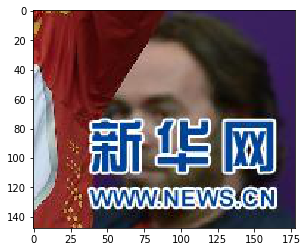

In [42]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

bbox=[705.0242919921875, 435.5804443359375, 178.1763916015625, 147.855224609375]

xmin, ymin, w, h = bbox
xmax = int(xmin + w)
ymax = int(ymin + h)
xmin=int(xmin)
ymin=int(ymin)

print(xmin, ymin, w, h)
img = Image.open('test.jpg')
img=np.array(img)
img=img[ymin:ymax,xmin:xmax]
plt.imshow(img)
plt.imsave('output1.png',img)

In [43]:
from PIL import Image
img = Image.open('output1.png').convert('LA')
img.save('greyscale.png')
